# The X-files problem

This problem is for used for practicing the abilities in data loading, cleaning and descriptive analysis. 

## Context

You’re at the airport, on your way to a Data Science conference abroad. A strange, but somewhat familiar man sits right next to you. He’s talking on the phone and wearing a tin hat. He briefly looks at you and turns away lowering his voice suspiciously. Although you know it isn’t right, you try to listen in on the conversation he’s having---let’s call it your scientific interest.

>  <font color= #2B65EC> **Strange Man**: ... not a real one, no. Do you know how rare U.F.O. sightings are? <br> </font>
<font color= green> **You**: Actually, it’s really simple, if you have the data. </font>

The old man looks at you, first alarmed and then with curiosity.

> <font color= #2B65EC> **Strange Man**: Explain. <br> </font>
<font color= green> **You**: Well, with enough data you can make estimations about the probability of an event, however rare it may occur. <br> </font>
<font color= #2B65EC> **Strange Man**: Can you do it? <br> </font>
<font color= green> **You**: Of course, I’m a data scientist. I just need data.” <br> </font>
<font color= #2B65EC> **Strange Man**: In that case... 
    
As the man spoke, he began rummaging through his travel bag until he pulled out a parcel covered in tinfoil. It was a shoebox filled with floppy disks

> <font color= #2B65EC> **Strange Man**: ...here’s data my company, Infinito, has collected about U.F.O. sightings. People from around the world go to my company’s website and fill-out a form about their U.F.O. experience. I would like to hire you to tell me where I should go if I want to see an U.F.O. or interview people that claim sightings. <br> </font>

As you take the box, still wondering where you’ll get a computer capable of reading the floppy disks, he gets up and starts to leave.

> <font color= #2B65EC> **Strange Man**: Ohhhh!  I almost forgot. Make sure you present your findings in a way my shareholders will understand. The truth may be out there... and no one is doing anything. </font>
    

## Data

The file that contains the information can be download from: [UFO-sightings Dataset](https://github.com/jeasusav10/IM-Automation/blob/main/X-files/UFO_sightings.csv)

Also, the next dataset was required to fill the blanks and verify some places based on the latitude and longitude: [Worldcities Dataset](https://github.com/jeasusav10/IM-Automation/blob/main/X-Files%20Problem/worldcities.csv)

The second dataset is opensouce and can be found at http://download.geonames.org/export/dump/


## Code

In general terms, the goal of the problem was to identify a <font color= red> **ranking of the places where UFOs have apperared with more frequency**. </font>

The code used **Pandas** for data manipulation and anlaysis, **Matplotlib** for data visualization and **Scipy** for measuring distances.

There are two libraries that could be  used **Gmaps** and **Geopy**. The first one is useful for creating interactive maps based on Google maps scheme. The second is tool for labeling the city, state and country based on coordinates. However the dataset is to large and it would take a lot of time to perform those tasks. 

### Import Data

The first was importing the data and libraries required.

In [7]:
#Import main libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.spatial.distance import cdist
%matplotlib inline

In [8]:
#Import data
path = "UFO_sightings.csv"  #Use the path of the csv
df = pd.read_csv(path) 

C:\ProgramData\Anaconda3\envs\py3env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
#Last five rows
df.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778


### Data Overview

It was nescesary to revise which parameters have *Null/NaN* values, in order to replace the *damaged* entries. Furthemore, it is useful to know how much data is on the dataset. The next line code helps on both tasks. 

In [10]:
#General information of the parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


The dataset included **11 parameters and 80332 enties**

The colums with missing values were:
- State
- Country 
- Shape
- Comments

According to the scope of the problem, **coments and shape** were not essential, as long as the goal was to identify the places with more probability to find UFOs. In fact, some parameters that were dropped because they did not generate any utility:
- comments: No specifications required
- shape: Shape was not required 
- duration (hours/min): Similar information could found at *duration (seconds)*
- date posted: Posted date did not helps to the task

In the case of **state and country** missing values, **latitude and logitude** were used to fill them.

Finally, it is important to notice that the columns **latitude and duration (seconds)** have some errors according to the Dtype, both should be *float64*.  

### Data Cleaning

The next step was dropping out the not required colums.

In [11]:
#Drop the non-essential columns
df = df.drop(['date posted','comments','duration (hours/min)', 'shape'], axis=1)
df.head()

,datetime,city,state,country,duration (seconds),latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,2700,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,7200,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,20,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,20,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,900,21.4180556,-157.803611


In order to facilitate data cleaning, the columns were renamed.

In [12]:
#Rename columns
df = df.rename(columns={'duration (seconds)': 'duration', 'latitude': 'lat', 'longitude ': 'lng'})
df.head()

,datetime,city,state,country,duration,lat,lng
0,10/10/1949 20:30,san marcos,tx,us,2700,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,7200,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,20,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,20,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,900,21.4180556,-157.803611


Then, it was necessary to solve Dtype problems for **lat and duration**

In [13]:
#Validate lat values
lat_vals = list(df['lat'])
for lat in lat_vals:
    if type(lat) == str:
        lat = float(lat)

ValueError: could not convert string to float: '33q.200088'

In [14]:
#Repeat the process excluding '33q.200088'
for lat in lat_vals:
    if type(lat) == str:
        if (lat) != '33q.200088': lat = float(lat)

Based on the lines above, there was one value causing problems in **lat**: '33q.200088'. 

The value was modified, and then the column was casted to *float64*.

In [15]:
#Replace the value and cast the column to float
df['lat'] = df['lat'].replace(['33q.200088'], '33.20008')
df['lat'] = df['lat'].astype(float)

The same process was done for **duration**, in which there were three wrong items 2', 8', 0.5' (the notation seemed they were minutes, so the replacement were the ammount of time in seconds (i.e. 2x60 =120).

In [16]:
#Validate duration values excluding '2`', '8`', '0.5`'
dur_vals = list(df['duration'])
wrong_dur = ('2`','8`','0.5`')
for dur in dur_vals:
    if type(dur) == str:
        if (dur) not in wrong_dur: dur = float(dur)

In [17]:
#Replace the values and cast the column to float
df['duration'] = df['duration'].replace(['2`','8`','0.5`'], [120,480,30])
df['duration'] = df['duration'].astype(float)

In [18]:
#Validate duration and lat are float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  80332 non-null  object 
 1   city      80332 non-null  object 
 2   state     74535 non-null  object 
 3   country   70662 non-null  object 
 4   duration  80332 non-null  float64
 5   lat       80332 non-null  float64
 6   lng       80332 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.3+ MB


At this moment, the **lat and lng** colums were useful to plot the data with a scatter plot.

This graph showed the distrubution on the globe of the entries.

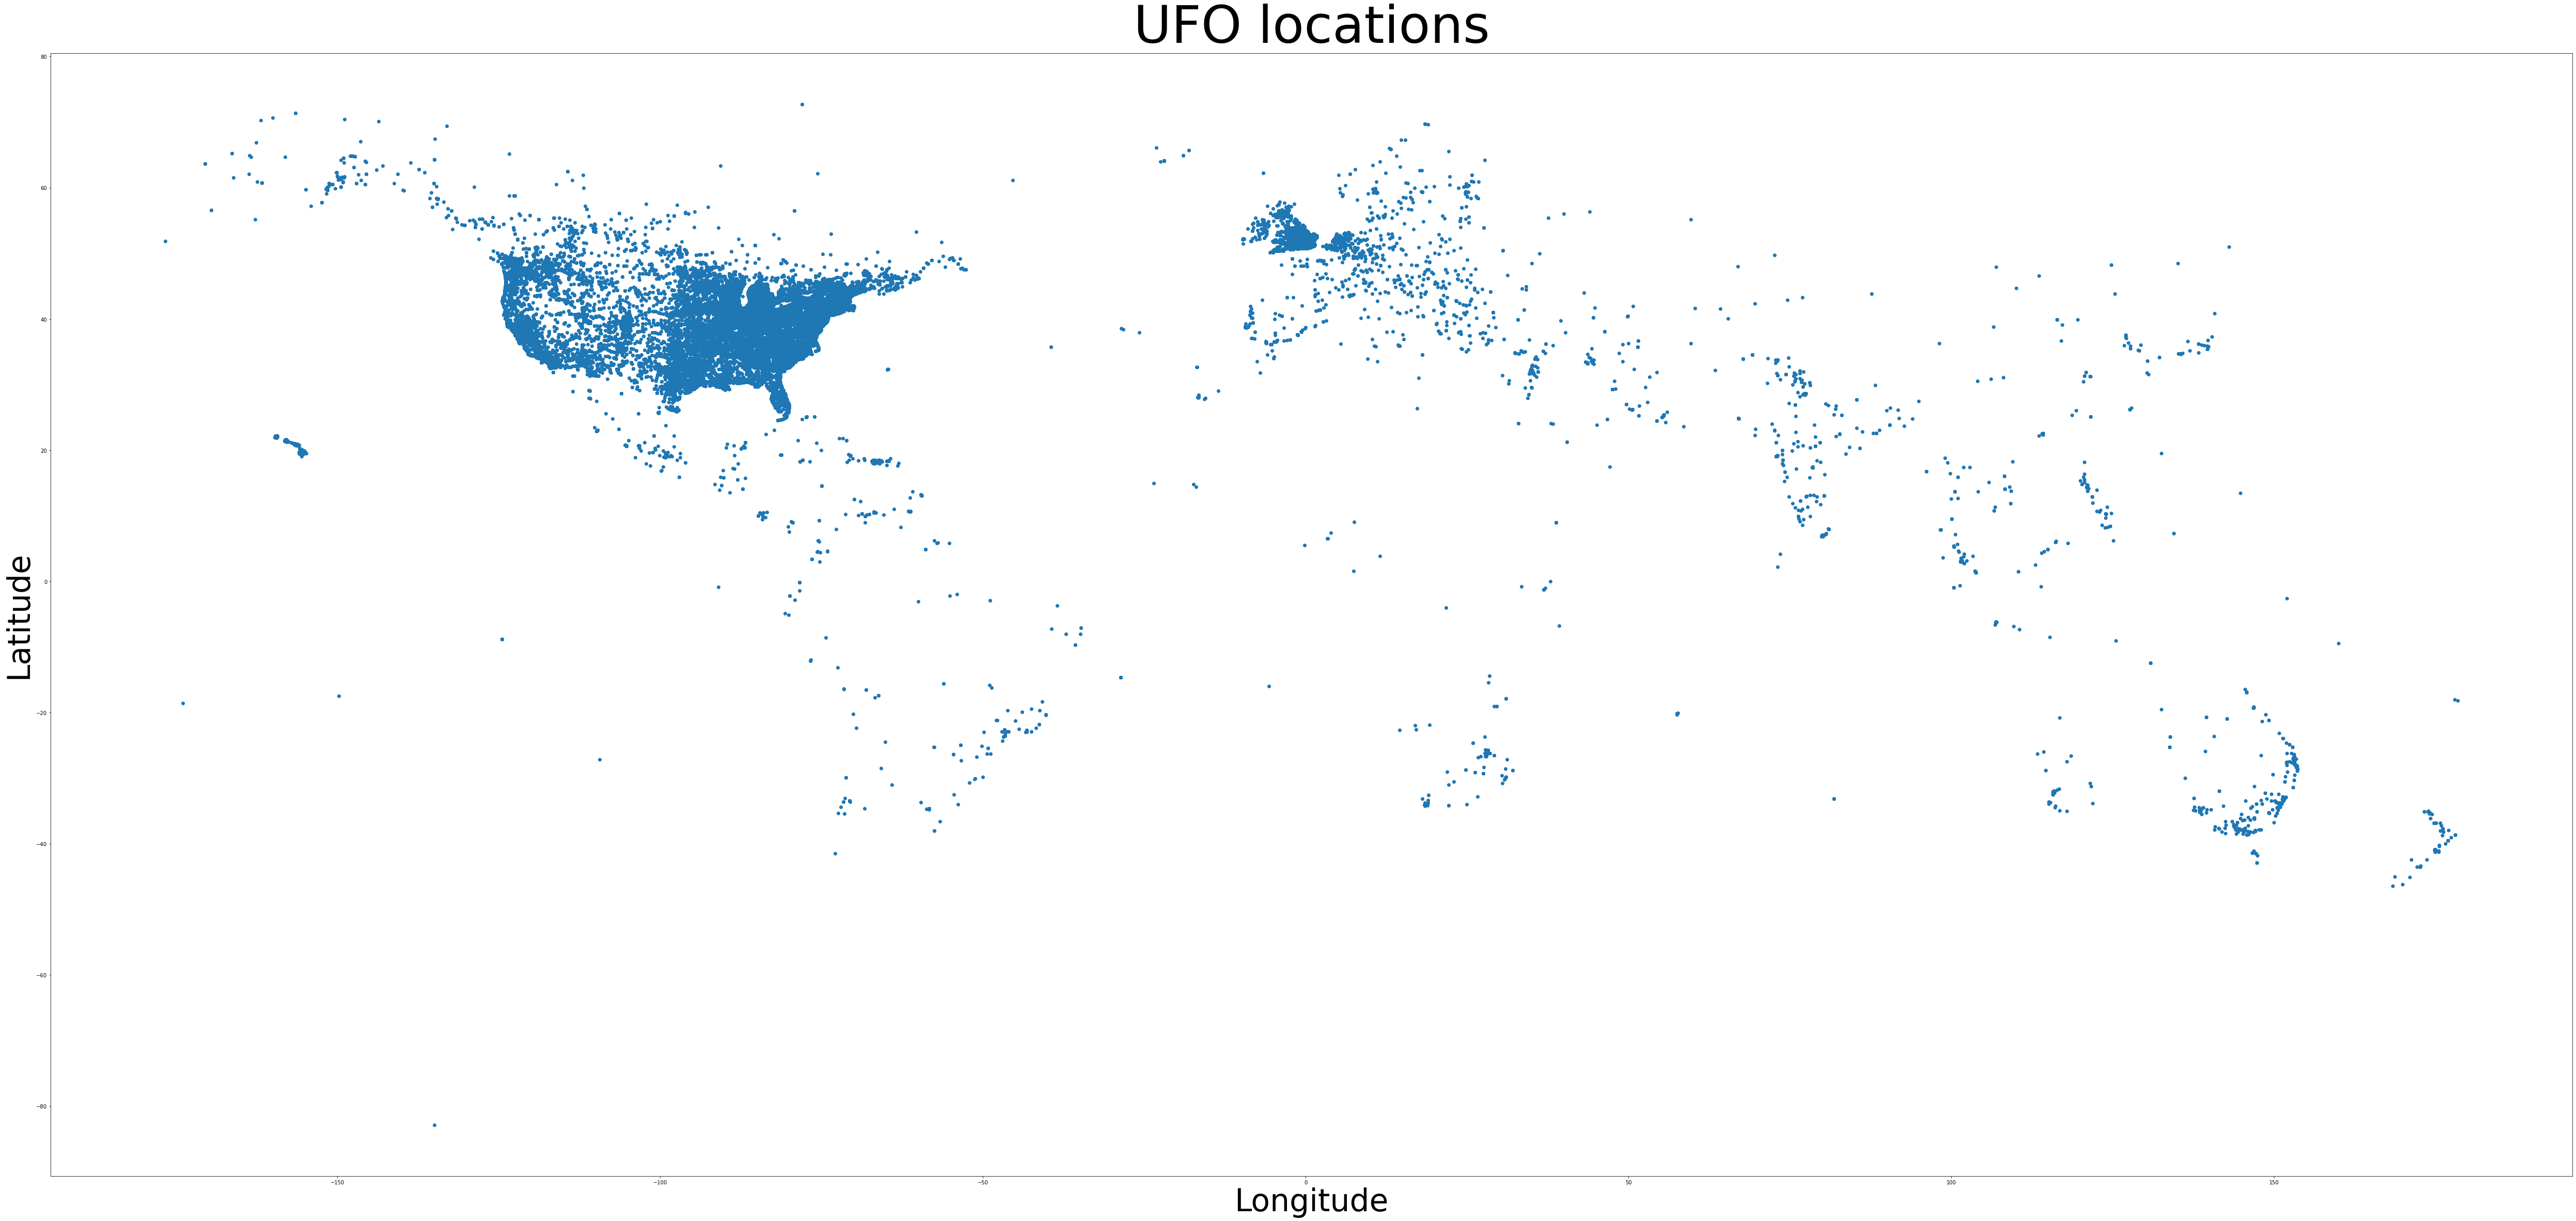

In [19]:
#Scatter plot of the entries
plt.figure(figsize=(350/4,160/4))
plt.title('UFO locations', fontsize=100)
plt.ylabel('Latitude', fontsize=60)
plt.xlabel('Longitude', fontsize=60)
plt.scatter(df['lng'],df['lat'])

The paramaters **lat and lng** were used to find missing values for city, state and country. In order to do that, it was required to load the second dataset, which includes that information based on latitude and longitude.

In [20]:
#Import second dataset
path_world = "worldcities.csv"  #Use the path of the csv
df_world = pd.read_csv(path_world) 

In [21]:
#First five rows
df_world.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


It can be seen that the notation for country its different. In order to be consistent all the values of the main dataset were compared agaist the values of the second dataset. The resulting items overwritten the previus values of the main dataset.

This helped in two things:
- Mantain notation consistency
- Fill missing values for **country**

In [22]:
#Include an extra parameter for comparisson
df['location'] = [(x, y) for x,y in zip(df['lat'], df['lng'])]
df_world['location'] = [(x, y) for x,y in zip(df_world['lat'], df_world['lng'])]
df.head()

,datetime,city,state,country,duration,lat,lng,location
0,10/10/1949 20:30,san marcos,tx,us,2700.0,29.883056,-97.941111,"(29.8830556, -97.94111109999999)"
1,10/10/1949 21:00,lackland afb,tx,NaN,7200.0,29.384210,-98.581082,"(29.38421, -98.581082)"
2,10/10/1955 17:00,chester (uk/england),NaN,gb,20.0,53.200000,-2.916667,"(53.2, -2.916667)"
3,10/10/1956 21:00,edna,tx,us,20.0,28.978333,-96.645833,"(28.9783333, -96.64583329999999)"
4,10/10/1960 20:00,kaneohe,hi,us,900.0,21.418056,-157.803611,"(21.4180556, -157.8036111)"


It is important to notice that the second dataset does not include the exact same value for **location**, so, it was necessary to find an approximation (**closest**) in order to find the best fit for **country** in each case. 

Also, the paramerter of **city** was modified using the second dataset.

In [23]:
#Find the closest value of the dataframe in the datast
def closest_location(point, points):
    return points[cdist([point], points).argmin()]

df['closest'] = [closest_location(x, list(df_world['location'])) for x in df['location']]

In [24]:
#Match city and country
def match_param(df, col1, x, col2):
    return df[df[col1] == x][col2].values[0]

df['country'] = [match_param(df_world, 'location', x, 'iso2') for x in df['closest']]
df['city'] = [match_param(df_world, 'location', x, 'city') for x in df['closest']]

A validation of the information were done trough the next lines.

In [25]:
#First five rows
df.head()

,datetime,city,state,country,duration,lat,lng,location,closest
0,10/10/1949 20:30,San Marcos,tx,US,2700.0,29.883056,-97.941111,"(29.8830556, -97.94111109999999)","(29.8736, -97.9381)"
1,10/10/1949 21:00,Lackland AFB,tx,US,7200.0,29.384210,-98.581082,"(29.38421, -98.581082)","(29.3867, -98.6179)"
2,10/10/1955 17:00,Chester,NaN,GB,20.0,53.200000,-2.916667,"(53.2, -2.916667)","(53.19, -2.89)"
3,10/10/1956 21:00,Edna,tx,US,20.0,28.978333,-96.645833,"(28.9783333, -96.64583329999999)","(28.9757, -96.6483)"
4,10/10/1960 20:00,Kaneohe,hi,US,900.0,21.418056,-157.803611,"(21.4180556, -157.8036111)","(21.4062, -157.7904)"


In [26]:
#General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  80332 non-null  object 
 1   city      80332 non-null  object 
 2   state     74535 non-null  object 
 3   country   80328 non-null  object 
 4   duration  80332 non-null  float64
 5   lat       80332 non-null  float64
 6   lng       80332 non-null  float64
 7   location  80332 non-null  object 
 8   closest   80332 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.5+ MB


It can be seen that there still four entries with *Null* values for **country**, these entries were dropped out.

In [27]:
#Drop null entries for contry
df = df[df['country'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80328 entries, 0 to 80331
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  80328 non-null  object 
 1   city      80328 non-null  object 
 2   state     74534 non-null  object 
 3   country   80328 non-null  object 
 4   duration  80328 non-null  float64
 5   lat       80328 non-null  float64
 6   lng       80328 non-null  float64
 7   location  80328 non-null  object 
 8   closest   80328 non-null  object 
dtypes: float64(3), object(6)
memory usage: 6.1+ MB


This is all for data cleaning, there are some null-values. The **state paramater** was not essential, as long as the city is now established.

### Data Visualization

The next graphs and tables represent the main important results for the data.

The first graph is the same showed previously, with out the four parameters that did not contain any country.

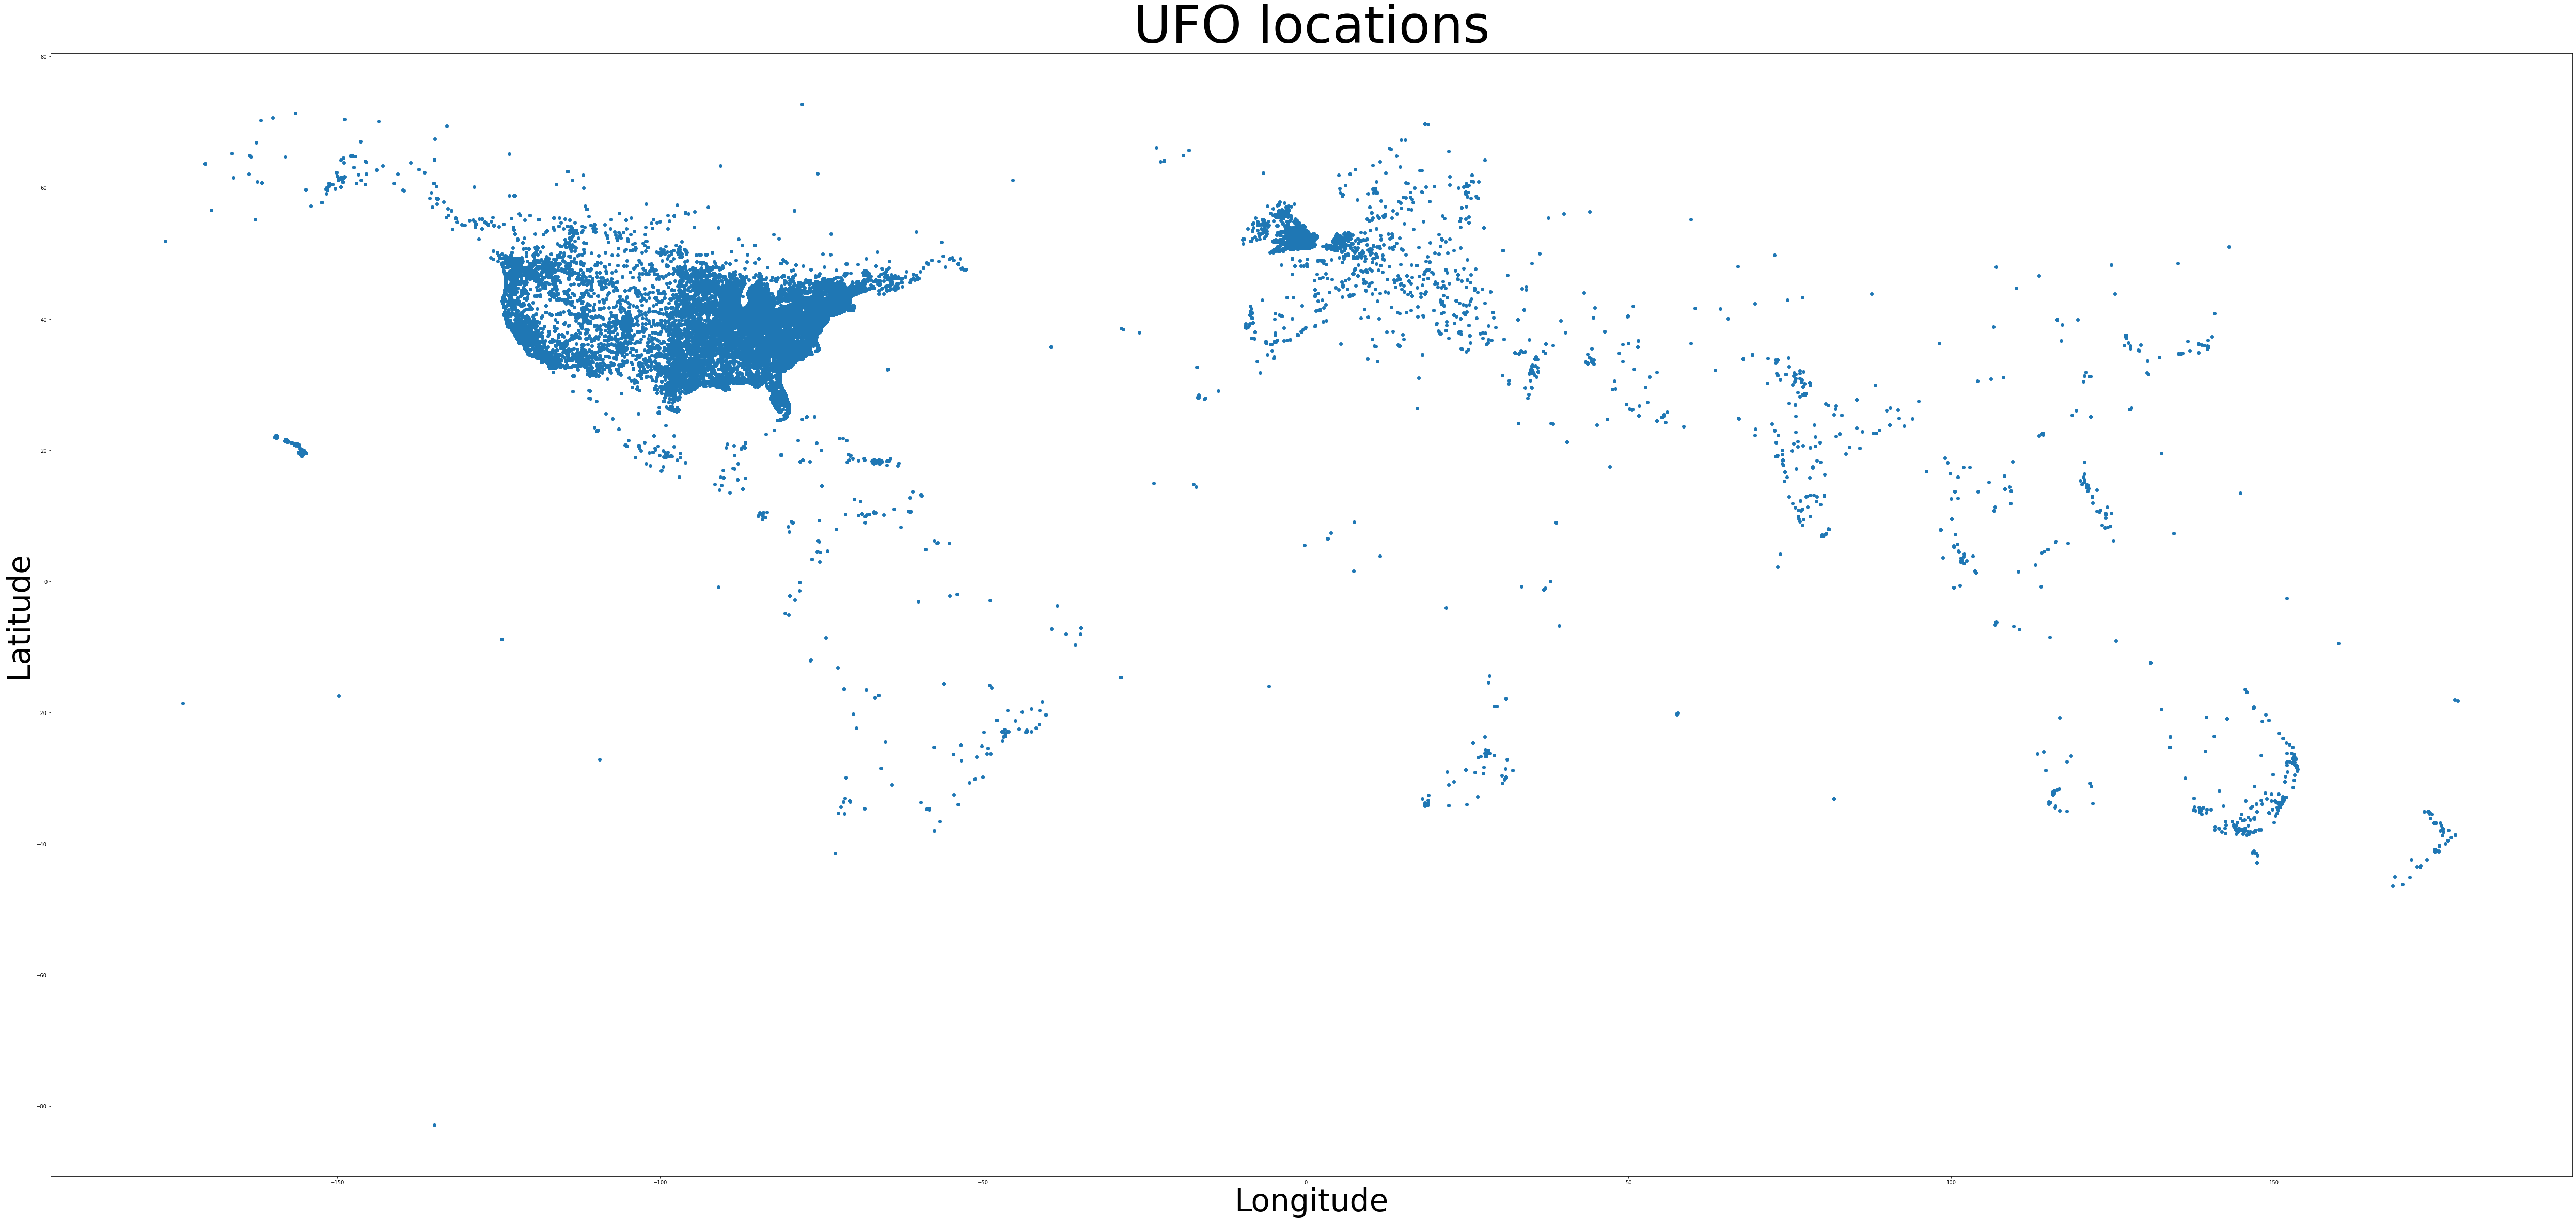

In [41]:
#Scatter plot of the entries
plt.figure(figsize=(350/4,160/4))
plt.title('UFO Appeareances', fontsize=100)
plt.ylabel('Latitude', fontsize=60)
plt.xlabel('Longitude', fontsize=60)
plt.scatter(df['lng'],df['lat'])

It can be seen that most of the information is centered in USA, Canada an Great Britain (confirmed with the next query). In order to define the places were most UFOs appeared, some datasets were created based on the first one.

In [46]:
#Count of UFO apperances per country
country_counts = dict(df.country.value_counts())
country_counts

{'US': 70594,
 'CA': 3683,
 'GB': 2383,
 'AU': 633,
 'MX': 428,
 'IN': 225,
 'DE': 152,
 'BR': 109,
 'NZ': 101,
 'NL': 92,
 'ZA': 92,
 'ES': 80,
 'FR': 65,
 'PR': 61,
 'IE': 60,
 'PH': 56,
 'JP': 53,
 'BE': 52,
 'MY': 52,
 'GR': 42,
 'NO': 42,
 'PT': 42,
 'CN': 40,
 'SE': 36,
 'CL': 36,
 'IT': 34,
 'IL': 33,
 'RU': 32,
 'PK': 31,
 'RO': 30,
 'IR': 27,
 'FI': 27,
 'TR': 26,
 'VE': 26,
 'IQ': 26,
 'CO': 26,
 'TH': 25,
 'CY': 24,
 'AR': 24,
 'HR': 24,
 'AE': 22,
 'SG': 22,
 'HU': 21,
 'VN': 20,
 'KR': 19,
 'PL': 16,
 'ID': 16,
 'BG': 16,
 'DK': 15,
 'LK': 15,
 'LB': 14,
 'CR': 13,
 'IS': 13,
 'LT': 13,
 'EE': 13,
 'UA': 13,
 'CH': 13,
 'EC': 12,
 'KW': 11,
 'SI': 11,
 'BD': 11,
 'AF': 11,
 'SA': 10,
 'JO': 10,
 'JM': 10,
 'DO': 10,
 'HK': 10,
 'BS': 10,
 'MT': 9,
 'MU': 9,
 'XK': 9,
 'RS': 9,
 'GT': 9,
 'EG': 8,
 'TT': 8,
 'BA': 8,
 'PE': 8,
 'HN': 8,
 'MA': 7,
 'BM': 7,
 'ZW': 7,
 'NG': 6,
 'JE': 6,
 'LU': 6,
 'AT': 6,
 'KE': 6,
 'SY': 6,
 'PA': 6,
 'BO': 6,
 'CU': 5,
 'BN': 5,
 'CZ': 5,

This second dataset included the five countries with more UFO appereances, excluding US.

In [87]:
#Five countries with more UFO appreances excluding US
df_country = df[df['country']=='IN']
df_country = pd.concat([df_country,df[df['country']=='CA']])
df_country = pd.concat([df_country,df[df['country']=='GB']])
df_country = pd.concat([df_country,df[df['country']=='AU']])    
df_country = pd.concat([df_country,df[df['country']=='MX']])
df_country.head()

,datetime,city,state,country,duration,lat,lng,location,closest
1087,10/12/2005 19:35,Gurgaon,NaN,IN,420.0,28.459497,77.026638,"(28.459497, 77.026638)","(28.45, 77.02)"
1184,10/12/2012 23:00,Vārānasi,NaN,IN,8.0,25.317645,82.973914,"(25.317645, 82.97391400000001)","(25.3189, 83.0128)"
1347,10/13/2007 04:50,Farīdābād,NaN,IN,120.0,28.535516,77.391026,"(28.535516, 77.391026)","(28.4333, 77.3167)"
1401,10/13/2011 18:45,Mysore,NaN,IN,10.0,12.295810,76.639381,"(12.29581, 76.639381)","(12.3086, 76.6531)"
1476,10/13/2013 23:05,Kolhāpur,NaN,IN,3.0,16.691308,74.244866,"(16.691308, 74.244866)","(16.7, 74.2333)"


<ipython-input-129-6d8b11150628>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


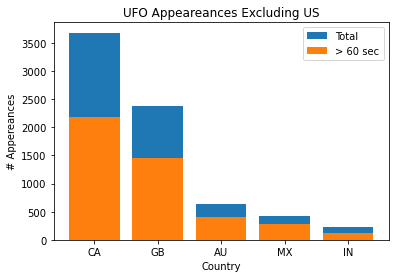

In [129]:
#Five countries with more UFO appreances excluding US
nus_countries = dict(df_country.country.value_counts())
nus_countries_plus60 = dict(df_country[df_country['duration']>60].country.value_counts())
plt.title('UFO Appeareances Excluding US')
plt.ylabel('# Appereances')
plt.xlabel('Country')
ax = plt.subplot(111)
total = ax.bar(nus_countries.keys(), nus_countries.values())
plus = ax.bar(nus_countries_plus60.keys(), nus_countries_plus60.values())
ax.legend((total,plus), ('Total','> 60 sec'))

In [139]:
#Count of UFO apperances per city excluding US
nus_cities = dict(df_country.city.value_counts())
nus_cities

{'Spitalfields': 208,
 'Toronto': 181,
 'Vancouver': 119,
 'Cornwall': 112,
 'Ottawa': 96,
 'Juárez': 91,
 'Sydney': 83,
 'Calgary': 82,
 'Montréal': 77,
 'Winnipeg': 76,
 'Melbourne': 70,
 'Rugby': 69,
 'Edmonton': 68,
 'London': 63,
 'Birmingham': 62,
 'Manchester': 62,
 'Hamilton': 60,
 'Halifax': 58,
 'Algodones': 55,
 'Perth': 52,
 'Windsor': 50,
 'Brisbane': 48,
 'Kelowna': 45,
 'Grimsby': 45,
 'Adelaide': 44,
 'Smithers': 41,
 'Glasgow': 41,
 'Saskatoon': 37,
 'Pickering': 36,
 'Regina': 35,
 'Sault Ste. Marie': 34,
 'Brampton': 33,
 'Basford': 33,
 'Burlington': 32,
 'Loyalist': 31,
 'Thunder Bay': 30,
 'Cancún': 30,
 'Terrace': 29,
 'Wallasey': 29,
 'Surrey': 29,
 'Coventry': 29,
 'Stratford': 28,
 'Bristol': 27,
 'Ajax': 25,
 'Oshawa': 24,
 'St. Catharines': 24,
 'Tijuana': 24,
 'Chilliwack': 24,
 'Whitehorse': 24,
 'Peterborough': 24,
 'Whitby': 23,
 'Kirkstall': 23,
 'Caerdydd': 23,
 'Puerto Vallarta': 23,
 'Gorebridge': 22,
 'Barrie': 22,
 'North Bay': 21,
 'Sudbury': 21,


In [146]:
#Ten most representative cities excluding us
df_nus_c = df_country[df_country['city']=='Spitalfields']
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Toronto']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Vancouver']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Cornwall']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Ottawa']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Juárez']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Sydney']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Calgary']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Montréal']])
df_nus_c = pd.concat([df_nus_c,df[df['city']=='Winnipeg']])
df_nus_c.head()

,datetime,city,state,country,duration,lat,lng,location,closest
321,10/11/2000 19:30,Spitalfields,NaN,GB,3.0,51.514125,-0.093689,"(51.514125, -0.093689)","(51.5166, -0.075)"
396,10/11/2007 23:00,Spitalfields,NaN,GB,300.0,51.514125,-0.093689,"(51.514125, -0.093689)","(51.5166, -0.075)"
983,10/1/2013 23:00,Spitalfields,NaN,GB,30.0,51.514125,-0.093689,"(51.514125, -0.093689)","(51.5166, -0.075)"
1749,10/15/1970 19:00,Spitalfields,NaN,GB,1800.0,51.514125,-0.093689,"(51.514125, -0.093689)","(51.5166, -0.075)"
1860,10/15/1988 19:30,Spitalfields,NaN,GB,240.0,51.514125,-0.093689,"(51.514125, -0.093689)","(51.5166, -0.075)"


<ipython-input-147-c761067cb9e0>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


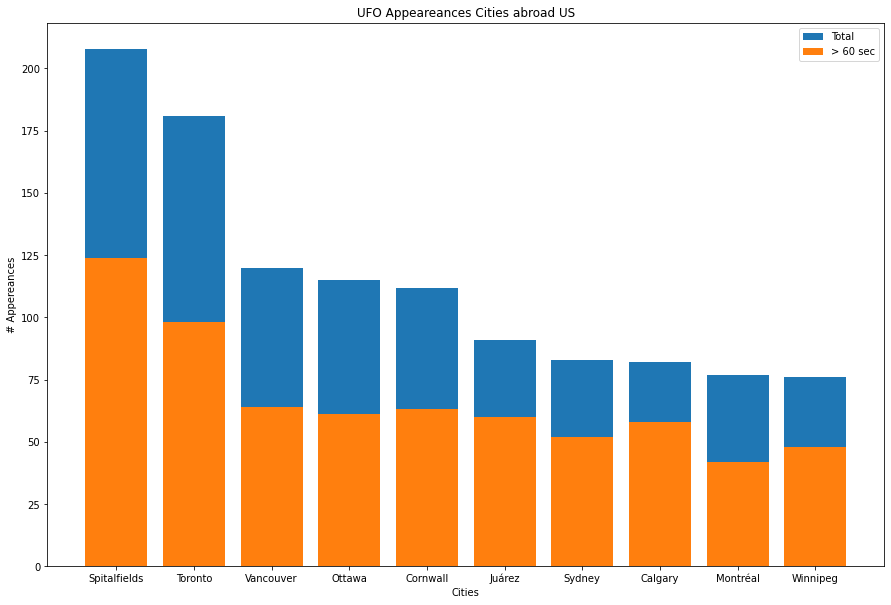

In [147]:
#Ten with more UFO appreances in US
nus_cities = dict(df_nus_c.city.value_counts())
nus_cities_plus60 = dict(df_nus_c[df_nus_c['duration']>60].city.value_counts())
plt.figure(figsize=(15,10))
plt.title('UFO Appeareances Cities abroad US')
plt.ylabel('# Appereances')
plt.xlabel('Cities')
ax = plt.subplot(111)
total = ax.bar(nus_cities.keys(), nus_cities.values())
plus = ax.bar(nus_cities_plus60.keys(), nus_cities_plus60.values())
ax.legend((total,plus), ('Total','> 60 sec'))

This third dataset only include US, because there are more data available.

It will be focused on the ten most representative cities.

In [116]:
#Dataset for US
df_us = df[df['country']=='US']
df_us.head()

,datetime,city,state,country,duration,lat,lng,location,closest
0,10/10/1949 20:30,San Marcos,tx,US,2700.0,29.883056,-97.941111,"(29.8830556, -97.94111109999999)","(29.8736, -97.9381)"
1,10/10/1949 21:00,Lackland AFB,tx,US,7200.0,29.384210,-98.581082,"(29.38421, -98.581082)","(29.3867, -98.6179)"
3,10/10/1956 21:00,Edna,tx,US,20.0,28.978333,-96.645833,"(28.9783333, -96.64583329999999)","(28.9757, -96.6483)"
4,10/10/1960 20:00,Kaneohe,hi,US,900.0,21.418056,-157.803611,"(21.4180556, -157.8036111)","(21.4062, -157.7904)"
5,10/10/1961 19:00,Bristol,tn,US,300.0,36.595000,-82.188889,"(36.595, -82.18888890000001)","(36.618, -82.1606)"


In [117]:
#Count of UFO apperances per city in US
city_counts = dict(df_us.city.value_counts())
city_counts

{'Seattle': 592,
 'Hoboken': 546,
 'Phoenix': 484,
 'Winchester': 446,
 'East Los Angeles': 398,
 'Portland': 393,
 'Coronado': 376,
 'Glendale': 328,
 'Houston': 312,
 'Conway': 307,
 'Chicago': 292,
 'Springfield': 270,
 'Miami': 252,
 'South Tucson': 247,
 'Albuquerque': 227,
 'Austin': 225,
 'Sacramento': 217,
 'San Francisco': 196,
 'Clarksville': 194,
 'San Jose': 194,
 'Columbus': 190,
 'Jacksonville': 187,
 'Dallas': 185,
 'San Antonio': 177,
 'Myrtle Beach': 165,
 'St. Louis': 159,
 'Richmond': 158,
 'Washington': 156,
 'Salem': 156,
 'Auburn': 154,
 'Jackson': 154,
 'Charlotte': 153,
 'Mesa': 147,
 'Tacoma': 141,
 'Spokane': 141,
 'Rochester': 141,
 'Council Bluffs': 140,
 'Salt Lake City': 139,
 'Hazel Dell': 139,
 'Indianapolis': 139,
 'Tinley Park': 137,
 'Tampa': 135,
 'Colorado Springs': 135,
 'Arlington': 135,
 'Plymouth': 131,
 'Camden': 128,
 'Kansas City': 127,
 'Rockford': 126,
 'Burbank': 125,
 'Cleveland': 125,
 'Reno': 123,
 'Paradise Valley': 122,
 'Pittsburgh':

In [126]:
#US dataset with most representative cities
df_us = df_us[df_us['city']=='Seattle']
df_us = pd.concat([df_us,df[df['city']=='Hoboken']])
df_us = pd.concat([df_us,df[df['city']=='Phoenix']])
df_us = pd.concat([df_us,df[df['city']=='Winchester']])
df_us = pd.concat([df_us,df[df['city']=='East Los Angeles']])
df_us = pd.concat([df_us,df[df['city']=='Portland']])
df_us = pd.concat([df_us,df[df['city']=='Coronado']])
df_us = pd.concat([df_us,df[df['city']=='Houston']])
df_us = pd.concat([df_us,df[df['city']=='Glendale']])
df_us = pd.concat([df_us,df[df['city']=='Conway']])
df_us.head()

,datetime,city,state,country,duration,lat,lng,location,closest
44,10/10/1988 22:45,Seattle,wa,US,2.0,47.606389,-122.330833,"(47.6063889, -122.33083329999998)","(47.6211, -122.3244)"
100,10/10/2000 21:30,Seattle,wa,US,10.0,47.606389,-122.330833,"(47.6063889, -122.33083329999998)","(47.6211, -122.3244)"
113,10/10/2002 06:00,Seattle,wa,US,90.0,47.606389,-122.330833,"(47.6063889, -122.33083329999998)","(47.6211, -122.3244)"
143,10/10/2005 07:40,Seattle,wa,US,60.0,47.606389,-122.330833,"(47.6063889, -122.33083329999998)","(47.6211, -122.3244)"
197,10/10/2008 20:00,Seattle,wa,US,180.0,47.606389,-122.330833,"(47.6063889, -122.33083329999998)","(47.6211, -122.3244)"


<ipython-input-137-f688f7c0c24e>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


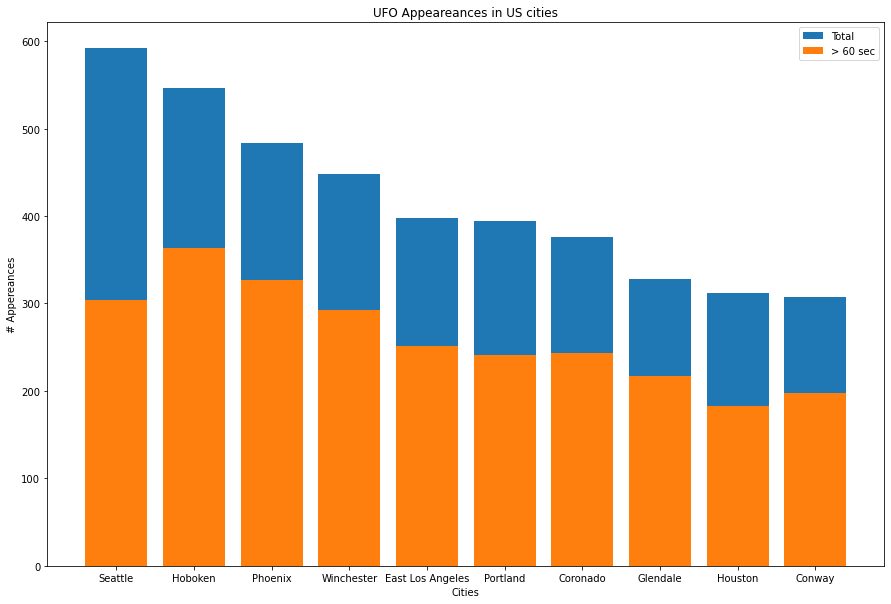

In [137]:
#Ten with more UFO appreances in US
us_cities = dict(df_us.city.value_counts())
us_cities_plus60 = dict(df_us[df_us['duration']>60].city.value_counts())
plt.figure(figsize=(15,10))
plt.title('UFO Appeareances in US cities')
plt.ylabel('# Appereances')
plt.xlabel('Cities')
ax = plt.subplot(111)
total = ax.bar(us_cities.keys(), us_cities.values())
plus = ax.bar(us_cities_plus60.keys(), us_cities_plus60.values())
ax.legend((total,plus), ('Total','> 60 sec'))

## Solution

Based on the information above, the top 10 locations where it is more probable to find UFO appearances are:
- Seattle
- Hoboken
- Phoenix
- Winchester
- Los Angeles (East)
- Porland
- Coronado
- Glendale
- Houston 
- Conway

All of them are inside USA, in case it is desired to travel abroad, the top ten cities are:
- Spittafields (CAN)
- Toronto (CAN)
- Vancouver (CAN)
- Ottawa (CAN)
- Cornwall (UK)
- Juárez (MX)
- Syndey (AUS)
- Calgary (CAN)
- Winnipeg (CAN)
- Montréal (CAN)